In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
from tslearn.clustering import silhouette_score
import seaborn as sns
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

import keras
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

# Bank Reserves

In [8]:
br_inputs = pd.read_csv("~/Desktop/TS-Clustering-Alt/SimData/bank_reserves_inputs.csv", header=None)
br_inputs_arr = br_inputs.iloc[:, 0].to_numpy()

In [10]:
labels_df = pd.read_json("~/Desktop/TS-Clustering-Alt/daep_labels_agglom_centroid.ndjson", lines=True)
method = "daep"      
abm = "BR"          
k = 7                #

row = labels_df[(labels_df["method"] == method) &
                (labels_df["abm"] == abm) &
                (labels_df["k"] == k)]

if not row.empty:
    labels = row.iloc[0]["labels"]
    print(f"Loaded {len(labels)} labels for {method.upper()} ({abm}), k={k}")
else:
    print("No matching entry found.")

Loaded 100000 labels for DAEP (BR), k=7


In [38]:
X_train, X_test, y_train, y_test = train_test_split(br_inputs, labels, test_size=0.1, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [39]:
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
report = classification_report(y_test, ypred)
print("Report:",)
print (report)
acc = accuracy_score(y_test,ypred)
print("Accuracy:",acc)

Confusion Matrix:
[[ 298    0    0    0   69   64    0]
 [   0  881    0   87    1    0   75]
 [   0    0 4264    0    0   62    0]
 [   0   99    0 2735    0    0    0]
 [  68    0    0    0  271    0   77]
 [  49    0   92    0    0  297    0]
 [   2   94    0    0   73    0  342]]
Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       431
           1       0.82      0.84      0.83      1044
           2       0.98      0.99      0.98      4326
           3       0.97      0.97      0.97      2834
           4       0.65      0.65      0.65       416
           5       0.70      0.68      0.69       438
           6       0.69      0.67      0.68       511

    accuracy                           0.91     10000
   macro avg       0.79      0.78      0.79     10000
weighted avg       0.91      0.91      0.91     10000

Accuracy: 0.9088


C:\Users\met48\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79 (316.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.6074 - loss: 3.1457 - val_accuracy: 0.7075 - val_loss: 0.6955
Epoch 2/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7281 - loss: 0.6575 - val_accuracy: 0.7602 - val_loss: 0.5468
Epoch 3/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7852 - loss: 0.5264 - val_accuracy: 0.8042 - val_loss: 0.4550
Epoch 4/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8275 - loss: 0.4417 - val_accuracy: 0.8546 - val_loss: 0.4011
Epoch 5/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8529 - loss: 0.3816 - val_accuracy: 0.8610 - val_loss: 0.3517
Epoch 6/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8692 - loss: 0.3432 - val_accuracy: 0.8776 - val_loss: 0.3371
Epoch 7/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8788 - loss: 0.3155 - val_accuracy: 0.8917 - val_loss: 0.3054
Epoch 8/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8876 - loss: 0

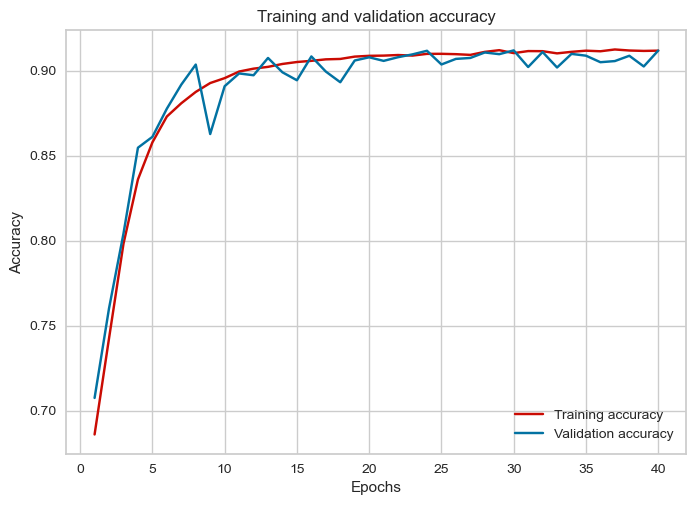

In [48]:
import matplotlib.pyplot as plt
X = X_train
Y = y_train
dummy_y = to_categorical(Y)

model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True)

history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=500, 
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')

plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

preds = model.predict(X) 
print(preds[0]) 
print(np.sum(preds[0])) 

matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))

In [49]:
preds = model.predict(X_test) 
print("Report:",)
print(classification_report(y_test, preds.argmax(axis=1)))
acc = accuracy_score(y_test,preds.argmax(axis=1))
print("Accuracy:",acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step
Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       431
           1       0.87      0.83      0.85      1044
           2       0.98      0.98      0.98      4326
           3       0.96      0.98      0.97      2834
           4       0.72      0.67      0.69       416
           5       0.72      0.76      0.74       438
           6       0.71      0.74      0.72       511

    accuracy                           0.92     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.92      0.92      0.92     10000

Accuracy: 0.9209


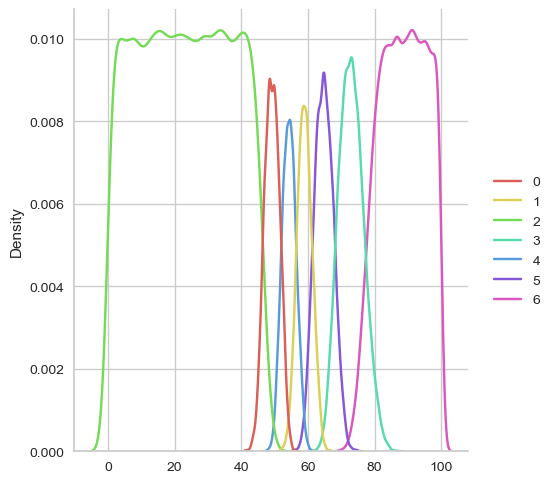

In [12]:
plt = sns.displot(x=br_inputs_arr, hue=labels, kind="kde", palette=sns.color_palette("hls", 7))

# Epstein Civil Violence

In [18]:
ecv_inputs = pd.read_csv("~/Desktop/TS-Clustering-Alt/SimData/epsteinCV_inputs.csv", header=None, sep=' ')
ecv_inputs_arr = ecv_inputs.iloc[:, 0].to_numpy()

In [20]:
labels_df = pd.read_json("~/Desktop/TS-Clustering-Alt/daep_labels_agglom_centroid.ndjson", lines=True)
method = "daep"      
abm = "ECV"          
k = 8                #

row = labels_df[(labels_df["method"] == method) &
                (labels_df["abm"] == abm) &
                (labels_df["k"] == k)]

if not row.empty:
    labels = row.iloc[0]["labels"]
    print(f"Loaded {len(labels)} labels for {method.upper()} ({abm}), k={k}")
else:
    print("No matching entry found.")

Loaded 50362 labels for DAEP (ECV), k=8


In [60]:
X_train, X_test, y_train, y_test = train_test_split(ecv_inputs, labels, test_size=0.1, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [61]:
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
report = classification_report(y_test, ypred)
print("Report:",)
print (report)
acc = accuracy_score(y_test,ypred)
print("Accuracy:",acc)

Confusion Matrix:
[[4162    1   35    6    4    0    1    1]
 [   3   25   12    0   35    6    0    0]
 [  48   11   92    1    5    7    0    0]
 [  14    0    0   24    6    0    2    0]
 [   5   17   11    3  426    0    0    0]
 [   2   10   18    0    6    1    0    0]
 [  13    0    1    8    2    0    4    0]
 [   3    0    0    0    6    0    0    0]]
Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4210
           1       0.39      0.31      0.34        81
           2       0.54      0.56      0.55       164
           3       0.57      0.52      0.55        46
           4       0.87      0.92      0.89       462
           5       0.07      0.03      0.04        37
           6       0.57      0.14      0.23        28
           7       0.00      0.00      0.00         9

    accuracy                           0.94      5037
   macro avg       0.50      0.43      0.45      5037
weighted avg       0.93      0.94

C:\Users\met48\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │            72 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104 (416.00 B)

 Trainable params: 104 (416.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7514 - loss: 0.8535 - val_accuracy: 0.8828 - val_loss: 0.4030
Epoch 2/500
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8897 - loss: 0.3692 - val_accuracy: 0.9081 - val_loss: 0.3003
Epoch 3/500
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9158 - loss: 0.2871 - val_accuracy: 0.9204 - val_loss: 0.2558
Epoch 4/500
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9228 - loss: 0.2521 - val_accuracy: 0.9302 - val_loss: 0.2243
Epoch 5/500
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9344 - loss: 0.2184 - val_accuracy: 0.9394 - val_loss: 0.2005
Epoch 6/500
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9428 - loss: 0.1960 - val_accuracy: 0.9403 - val_loss: 0.1855
Epoch 7/500
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9455 - loss: 0.1779 - val_accuracy: 0.9421 - val_loss: 0.1743
Epoch 8/500
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9454 - loss: 0

C:\Users\met48\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\met48\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\met48\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

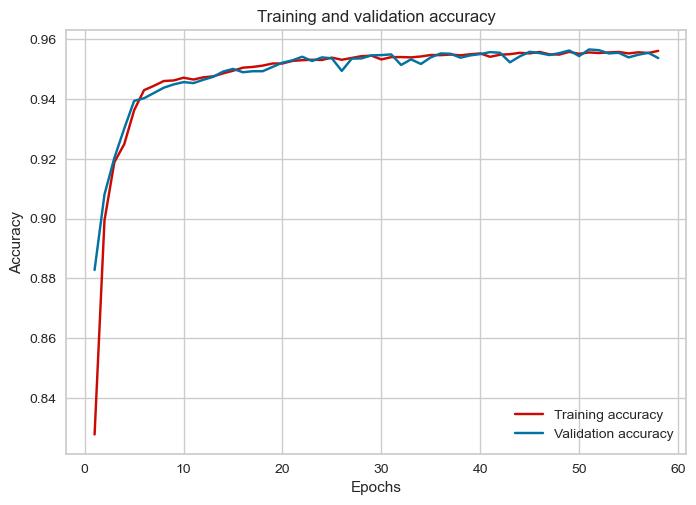

In [63]:
import matplotlib.pyplot as plt
X = X_train
Y = y_train
dummy_y = to_categorical(Y)

model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(8, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True)

history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=500, 
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')

plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

preds = model.predict(X) 
print(preds[0]) 
print(np.sum(preds[0])) 

matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))

In [64]:
preds = model.predict(X_test) 
print("Report:",)
print(classification_report(y_test, preds.argmax(axis=1)))
acc = accuracy_score(y_test,preds.argmax(axis=1))
print("Accuracy:",acc)

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step
Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4210
           1       0.56      0.37      0.44        81
           2       0.61      0.73      0.66       164
           3       0.60      0.61      0.60        46
           4       0.89      0.96      0.92       462
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00        28
           7       0.00      0.00      0.00         9

    accuracy                           0.95      5037
   macro avg       0.45      0.46      0.45      5037
weighted avg       0.94      0.95      0.94      5037

Accuracy: 0.9513599364701211


C:\Users\met48\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\met48\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\met48\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

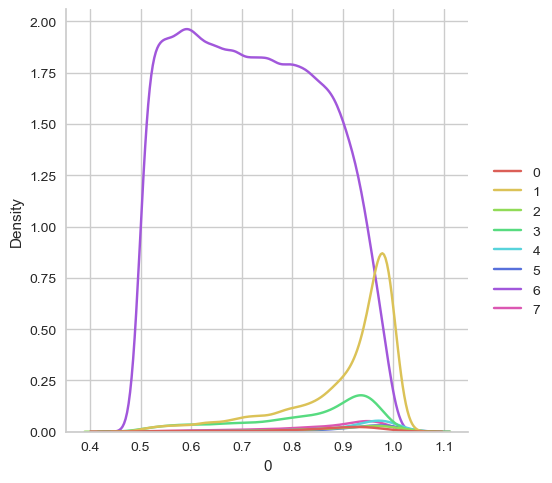

In [22]:
plt = sns.displot(x=ecv_inputs[0], hue=labels, kind="kde", palette=sns.color_palette("hls", 8))

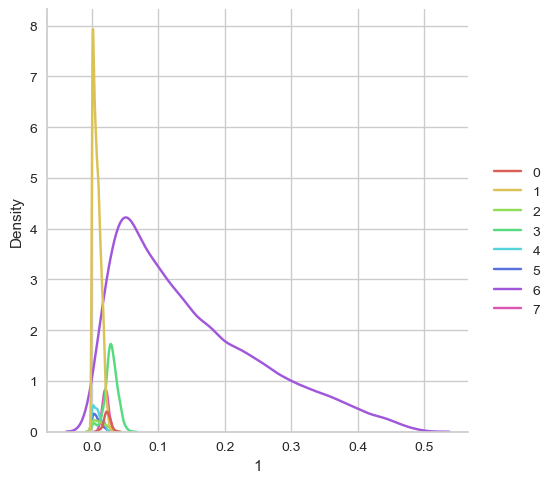

In [24]:
plt = sns.displot(x=ecv_inputs[1], hue=labels, kind="kde", palette=sns.color_palette("hls", 8))

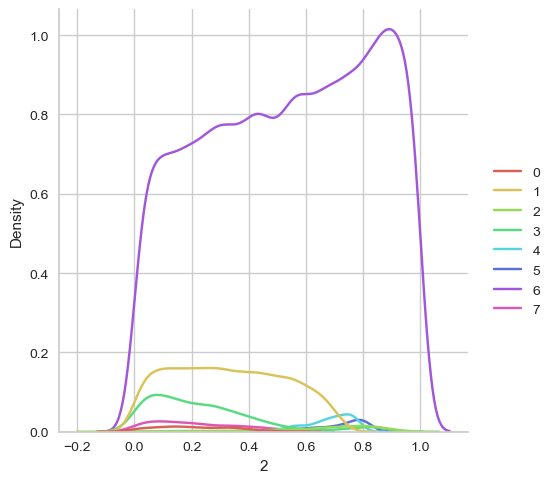

In [26]:
plt = sns.displot(x=ecv_inputs[2], hue=labels, kind="kde", palette=sns.color_palette("hls", 8))

# Forest Fire

In [29]:
ff_inputs = pd.read_csv("~/Desktop/TS-Clustering-Alt/SimData/forest_fire_inputs.csv", header=None, sep=' ')
ff_inputs_arr = ff_inputs.iloc[:, 0].to_numpy()

In [31]:
labels_df = pd.read_json("~/Desktop/TS-Clustering-Alt/daep_labels_agglom_centroid.ndjson", lines=True)
method = "daep"      
abm = "FF"          
k = 4                #

row = labels_df[(labels_df["method"] == method) &
                (labels_df["abm"] == abm) &
                (labels_df["k"] == k)]

if not row.empty:
    labels = row.iloc[0]["labels"]
    print(f"Loaded {len(labels)} labels for {method.upper()} ({abm}), k={k}")
else:
    print("No matching entry found.")

Loaded 100000 labels for DAEP (FF), k=4


C:\Users\Maria\AppData\Local\Temp\ipykernel_21684\1206107485.py:1: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  plt = sns.displot(x=ff_inputs[0], hue=labels, kind="kde", palette=sns.color_palette("hls", 8))


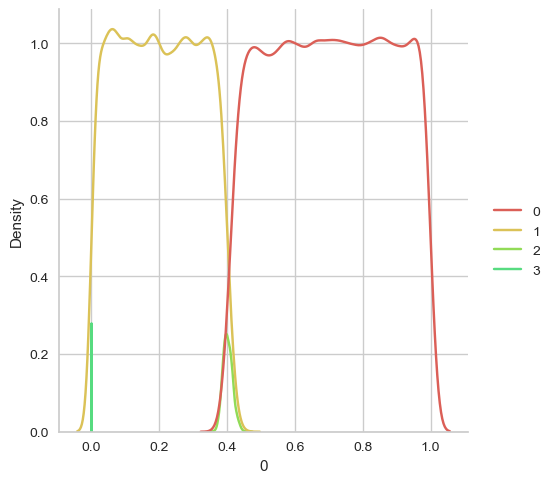

In [33]:
plt = sns.displot(x=ff_inputs[0], hue=labels, kind="kde", palette=sns.color_palette("hls", 8))

In [47]:
labels_df = pd.read_json("~/Desktop/TS-Clustering-Alt/dae_labels.ndjson", lines=True)
method = "dae"      
abm = "FF"          
k = 4                #

row = labels_df[(labels_df["method"] == method) &
                (labels_df["abm"] == abm) &
                (labels_df["k"] == k)]

if not row.empty:
    labels = row.iloc[0]["labels"]
    print(f"Loaded {len(labels)} labels for {method.upper()} ({abm}), k={k}")
else:
    print("No matching entry found.")

Loaded 100000 labels for DAE (FF), k=4


C:\Users\Maria\AppData\Local\Temp\ipykernel_21684\1206107485.py:1: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  plt = sns.displot(x=ff_inputs[0], hue=labels, kind="kde", palette=sns.color_palette("hls", 8))


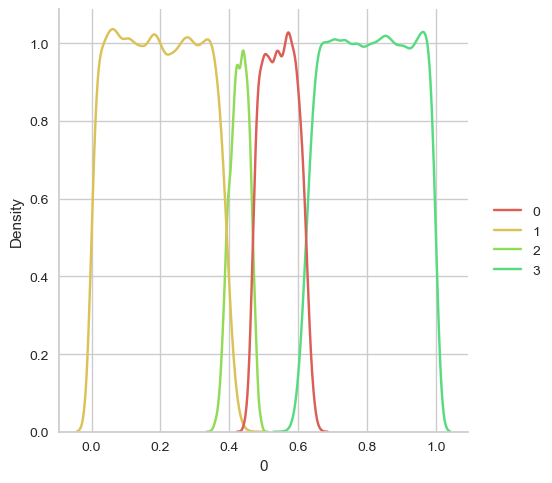

In [49]:
plt = sns.displot(x=ff_inputs[0], hue=labels, kind="kde", palette=sns.color_palette("hls", 8))